In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

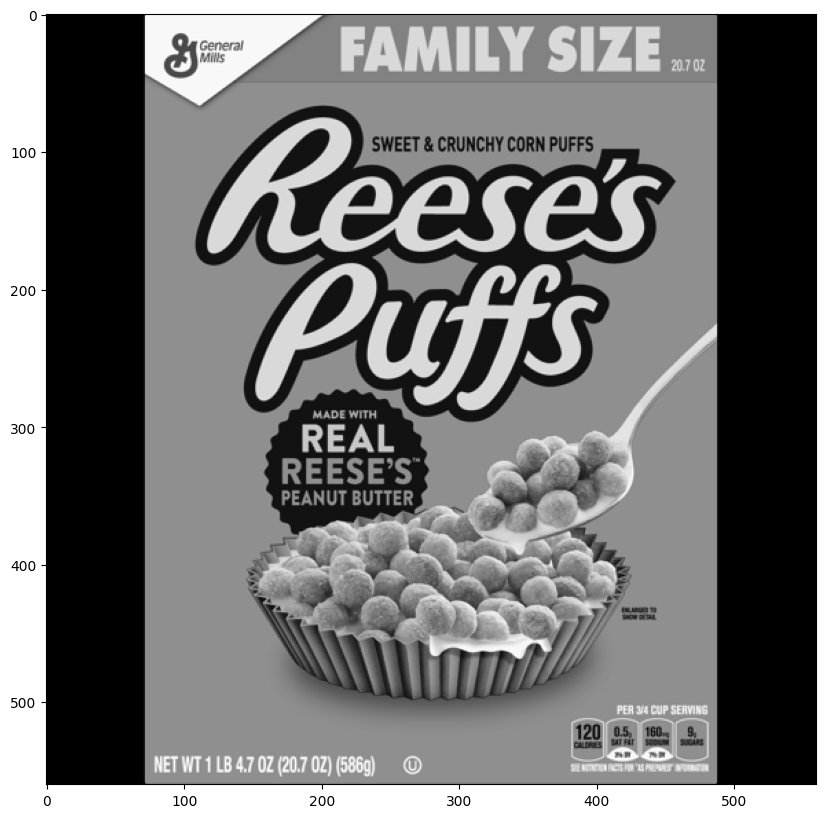

In [4]:
reeses = cv2.imread('DATA/reeses_puffs.png', 0)
display(reeses)

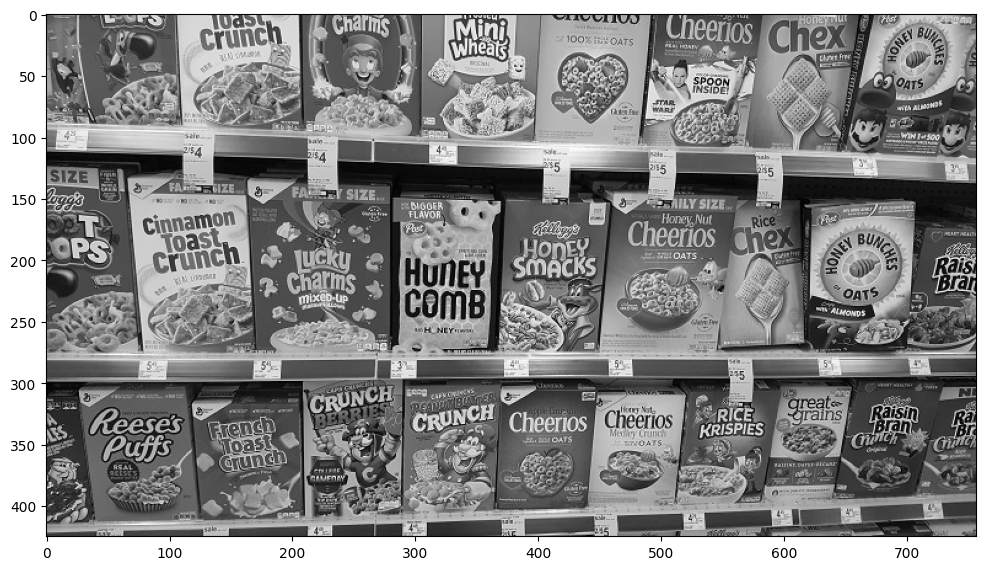

In [5]:
cereals = cv2.imread('DATA/many_cereals.jpg', 0)
display(cereals)

< cv2.DMatch 000001DD1A83A790>
139


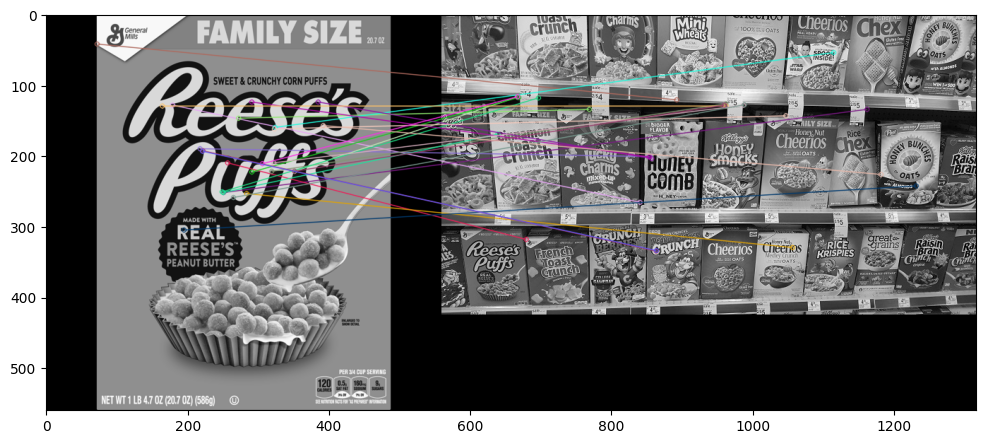

In [6]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
print(matches[0])
print(len(matches))
matches = sorted(matches, key=lambda x: x.distance)
reeses_matches = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25], None, flags=2)
display(reeses_matches)

In [12]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
print(len(matches))

good = []
for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

print(len(good))

1501
79


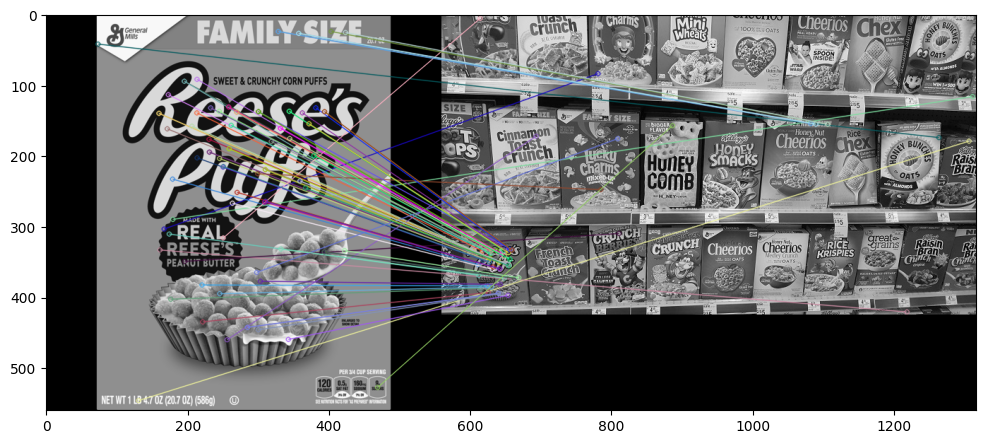

In [13]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)
display(sift_matches)

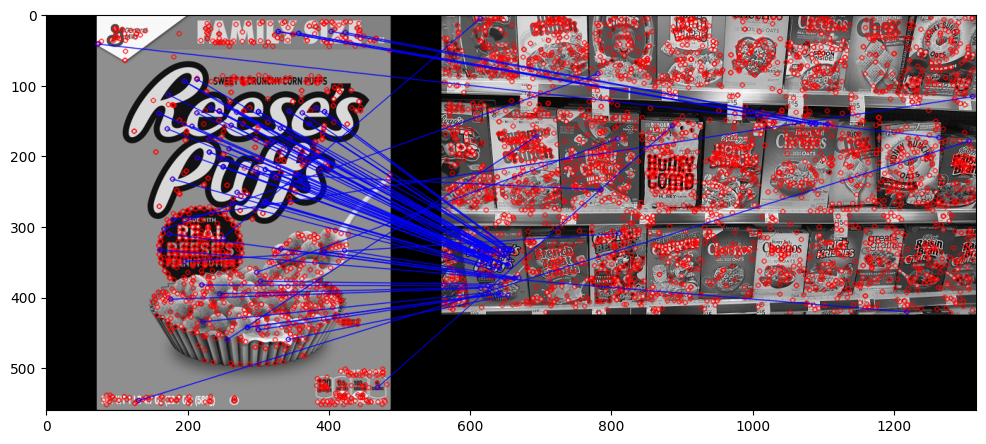

In [17]:
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

FLAN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLAN_INDEX_KDTREE, trees = 5)
search_param = dict(checks = 50)

flann = cv2.FlannBasedMatcher(indexParams=index_params, searchParams=search_param)
matches = flann.knnMatch(des1, des2, k=2)

matchesMask = [[0, 0] for i in range(len(matches))]

good = []
for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.75*match2.distance:
        matchesMask[i] = [1, 0]

draw_params = dict(matchColor = (0, 0, 255), singlePointColor=(255, 0, 0), matchesMask=matchesMask, flags=0)
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)
display(flann_matches)

